In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from shapely import wkt
from shapely.geometry import box
import gc
import pandas as pd
import pickle
import cartopy.crs as ccrs
import geopandas as gpd

In [2]:
import os

def count_files_with_extension(directory, extension):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extension):
                count += 1
    return count

# Example usage:
directory_path = '/home/udas/Desktop/UD_Data_Copy/b.final_burned_area'
extension = '.nc'  # specify the extension
count = count_files_with_extension(directory_path, extension)
print(f'There are {count} files with the {extension} extension.')


There are 17859 files with the .nc extension.


## Visualise Features


/tmp/ipykernel_2246586/1202812521.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Reds')


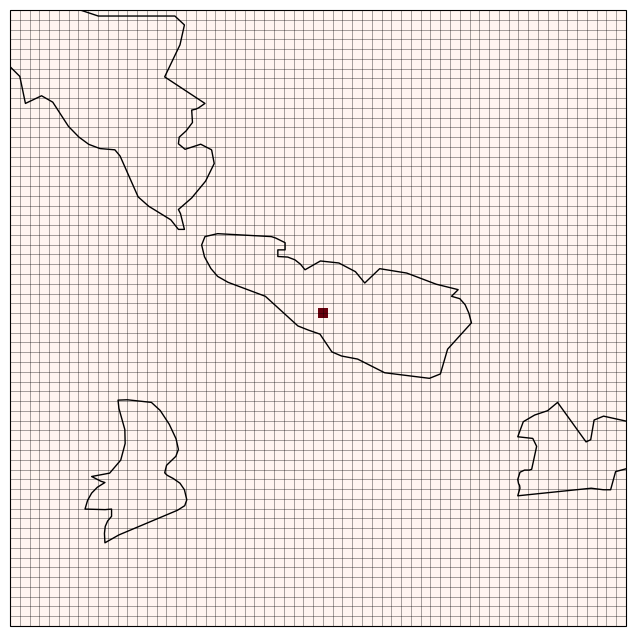

In [4]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def visualise_map_with_grid_and_ignition_points(dataset_path, save_path):
    ds = xr.open_dataset(dataset_path)
    ds = ds.fillna(0)  # Fill null values with 0

    # Extract latitude and longitude boundaries
    lat_min, lat_max = ds.y.min().item(), ds.y.max().item()
    lon_min, lon_max = ds.x.min().item(), ds.x.max().item()

    # Extract ignition point data, assuming it's 64x64
    ignition_points = ds['ignition_points'].values.squeeze()

    # Set up the plot with PlateCarree projection
    plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set the map extent to match the dataset boundaries
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Add coastlines and borders
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Create a colormap with red for positive values and white for zero
    cmap = plt.cm.get_cmap('Reds')
    cmap.set_under('white')

    # Display the ignition points using imshow, setting the extent to match lat/lon boundaries
    im = ax.imshow(ignition_points, cmap=cmap, vmin=0, vmax=ignition_points.max(),
                   extent=[lon_min, lon_max, lat_min, lat_max], origin='upper', interpolation='nearest')

    # Plot the grid lines with higher zorder
    lat_lines = [lat_min + i * (lat_max - lat_min) / 63 for i in range(64)]
    lon_lines = [lon_min + i * (lon_max - lon_min) / 63 for i in range(64)]
    ax.vlines(x=lon_lines, ymin=lat_min, ymax=lat_max, colors='black', linewidth=0.5, alpha=0.5, zorder=2)
    ax.hlines(y=lat_lines, xmin=lon_min, xmax=lon_max, colors='black', linewidth=0.5, alpha=0.5, zorder=2)

    # Add a colorbar
    # plt.colorbar(im, label='Ignition Point')

    # Set title and save
    # ax.set_title('Map with 64x64 Grid Overlay and Ignition Points', fontsize=16)
    filename_suffix = dataset_path.split('burned_area/')[-1].replace('.nc', '').replace('/', '_')
    plt.savefig(os.path.join(save_path, f'map_with_grid_and_ignition_points_{filename_suffix}.png'), dpi=300, bbox_inches='tight')
    plt.show()

# Usage
sd_path = '/home/udas/Desktop/UD_Data_Copy/b.final_burned_area/2016/sample_8546.nc'
save_pth = '/home/udas/Desktop/UD_Data_Copy/Spatial_Models/graph_class_scripts/visualisations'
visualise_map_with_grid_and_ignition_points(sd_path, save_pth)


/tmp/ipykernel_2246586/1918440815.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Reds')


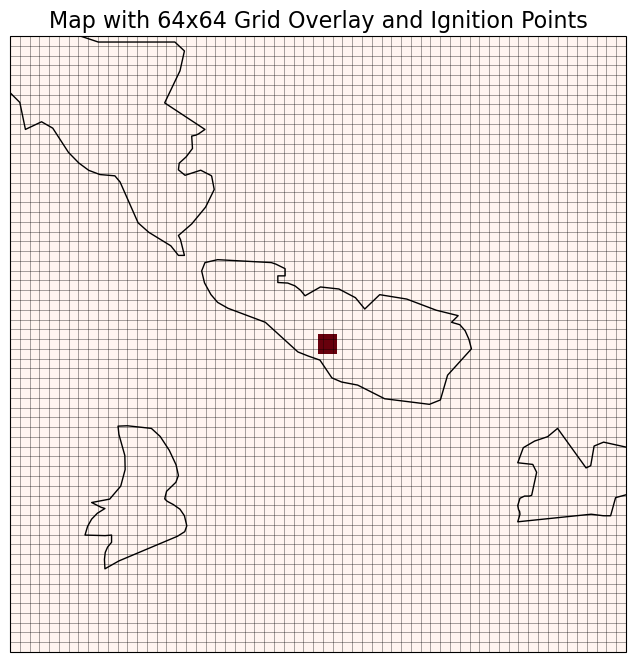

In [5]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def visualise_map_with_grid_and_ignition_points(dataset_path, save_path):
    ds = xr.open_dataset(dataset_path)
    ds = ds.fillna(0)  # Fill null values with 0

    # Extract latitude and longitude boundaries
    lat_min, lat_max = ds.y.min().item(), ds.y.max().item()
    lon_min, lon_max = ds.x.min().item(), ds.x.max().item()

    # Extract ignition point data, assuming it's 64x64
    ignition_points = ds['burned_areas'].values.squeeze()

    # Set up the plot with PlateCarree projection
    plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set the map extent to match the dataset boundaries
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Add coastlines and borders
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Create a colormap with red for positive values and white for zero
    cmap = plt.cm.get_cmap('Reds')
    cmap.set_under('white')

    # Display the ignition points using imshow, setting the extent to match lat/lon boundaries
    im = ax.imshow(ignition_points, cmap=cmap, vmin=0, vmax=ignition_points.max(),
                   extent=[lon_min, lon_max, lat_min, lat_max], origin='upper', interpolation='nearest')

    # Plot the grid lines with higher zorder
    lat_lines = [lat_min + i * (lat_max - lat_min) / 63 for i in range(64)]
    lon_lines = [lon_min + i * (lon_max - lon_min) / 63 for i in range(64)]
    ax.vlines(x=lon_lines, ymin=lat_min, ymax=lat_max, colors='black', linewidth=0.5, alpha=0.5, zorder=2)
    ax.hlines(y=lat_lines, xmin=lon_min, xmax=lon_max, colors='black', linewidth=0.5, alpha=0.5, zorder=2)

    # Add a colorbar
    # plt.colorbar(im, label='Ignition Point')

    # Set title and save
    ax.set_title('Map with 64x64 Grid Overlay and Ignition Points', fontsize=16)
    filename_suffix = dataset_path.split('burned_area/')[-1].replace('.nc', '').replace('/', '_')
    plt.savefig(os.path.join(save_path, f'map_with_grid_and_burned_{filename_suffix}.png'), dpi=300, bbox_inches='tight')
    plt.show()

# Usage
sd_path = '/home/udas/Desktop/UD_Data_Copy/b.final_burned_area/2016/sample_8546.nc'
save_pth = '/home/udas/Desktop/UD_Data_Copy/Spatial_Models/graph_class_scripts/visualisations'
visualise_map_with_grid_and_ignition_points(sd_path, save_pth)


aspect <class 'str'>


NameError: name 'cfeature' is not defined

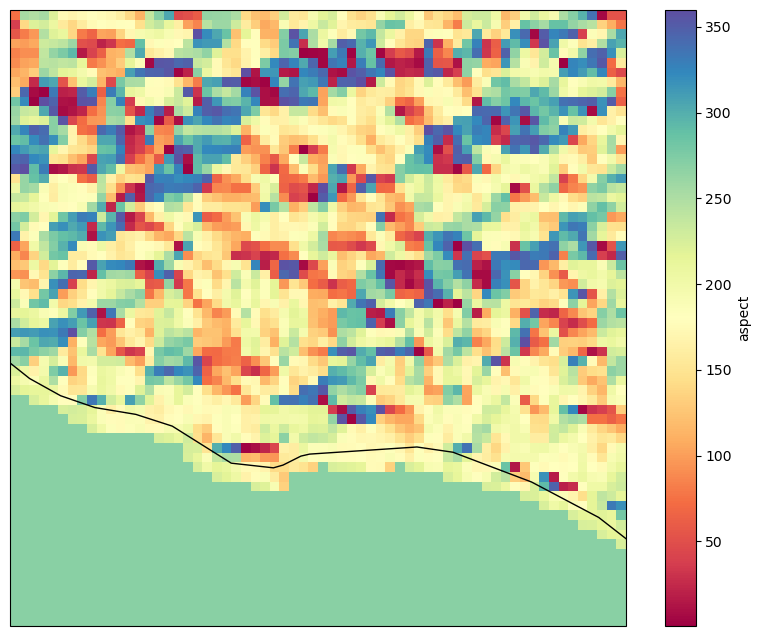

In [2]:
def visualise_features(dataset_path,save_path):
    ds=xr.open_dataset(dataset_path)
     # Fill null values with 0
    ds = ds.fillna(0)

    # Extract the minimum and maximum latitude values
    # lat_min = ds.latitude.min().item()
    # lat_max = ds.latitude.max().item()
    time=ds.time.item()
    for var in ds.data_vars:
        if var !='spatial_ref':
            print(var, type(var))
            # Set up the plot with a projection
            plt.figure(figsize=(10, 8))
            ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for simple geographic projections

            # Plot wind_direction data
            ds[var].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Spectral')

            # Add coastlines
            ax.coastlines()

            # Optionally, add other map features (rivers, borders, etc.)
            ax.add_feature(cfeature.BORDERS, linestyle=':')
            # ax.add_feature(cfeature.LAND)
            # ax.add_feature(cfeature.OCEAN)

            ax.set_title(f'{var}', fontsize=16)

            filename_suffix = dataset_path.split('burned_area/')[-1].replace('.nc', '').replace('/','_')
            # print(filename_suffix)
            # Show the plot
            plt.savefig(os.path.join(save_path,f'{var}_{filename_suffix}.png'), dpi=300, bbox_inches='tight')
            plt.show()

sd_path='/home/udas/Desktop/UD_Data_Copy/b.final_burned_area/2016/sample_7774.nc'
save_pth='/home/udas/Desktop/UD_Data_Copy/Spatial_Models/graph_class_scripts/visualisations'
visualise_features(sd_path,save_pth)

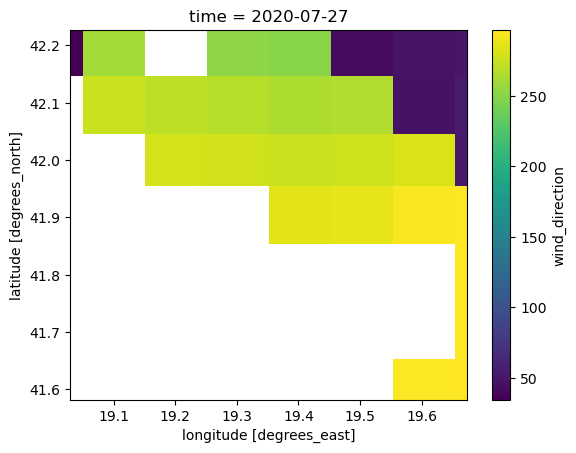

In [4]:
ds= xr.open_dataset('/home/udas/Desktop/UD_Data_Copy/b.final_burned_area/2020/sample_12548.nc')
ds=ds.wind_direction.plot()

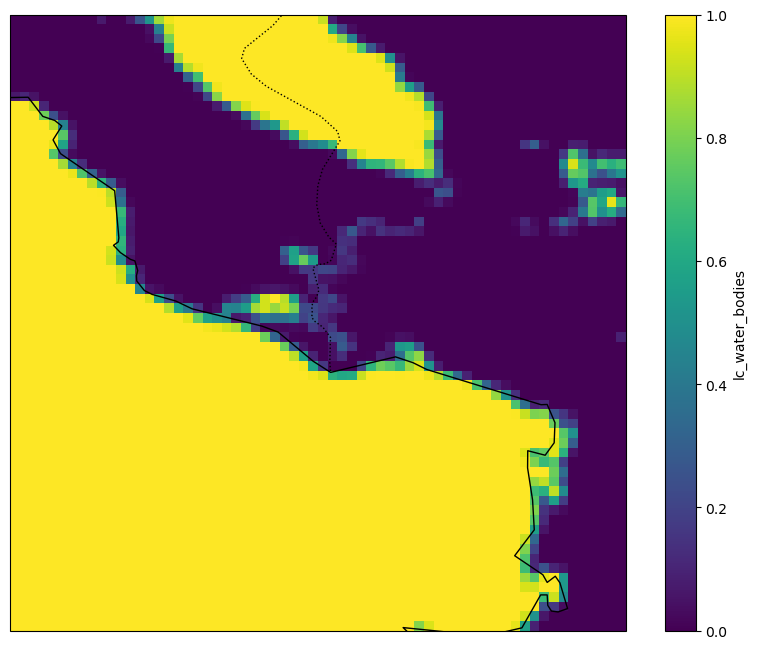

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load your dataset
ds = xr.open_dataset('/home/udas/Desktop/UD_Data_Copy/b.final_burned_area/2020/sample_12548.nc')

# Set up the plot with a projection
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for simple geographic projections

# Plot wind_direction data
ds.lc_water_bodies.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add coastlines
ax.coastlines()

# Optionally, add other map features (rivers, borders, etc.)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Show the plot
plt.show()

### Fire Distribution Per Year

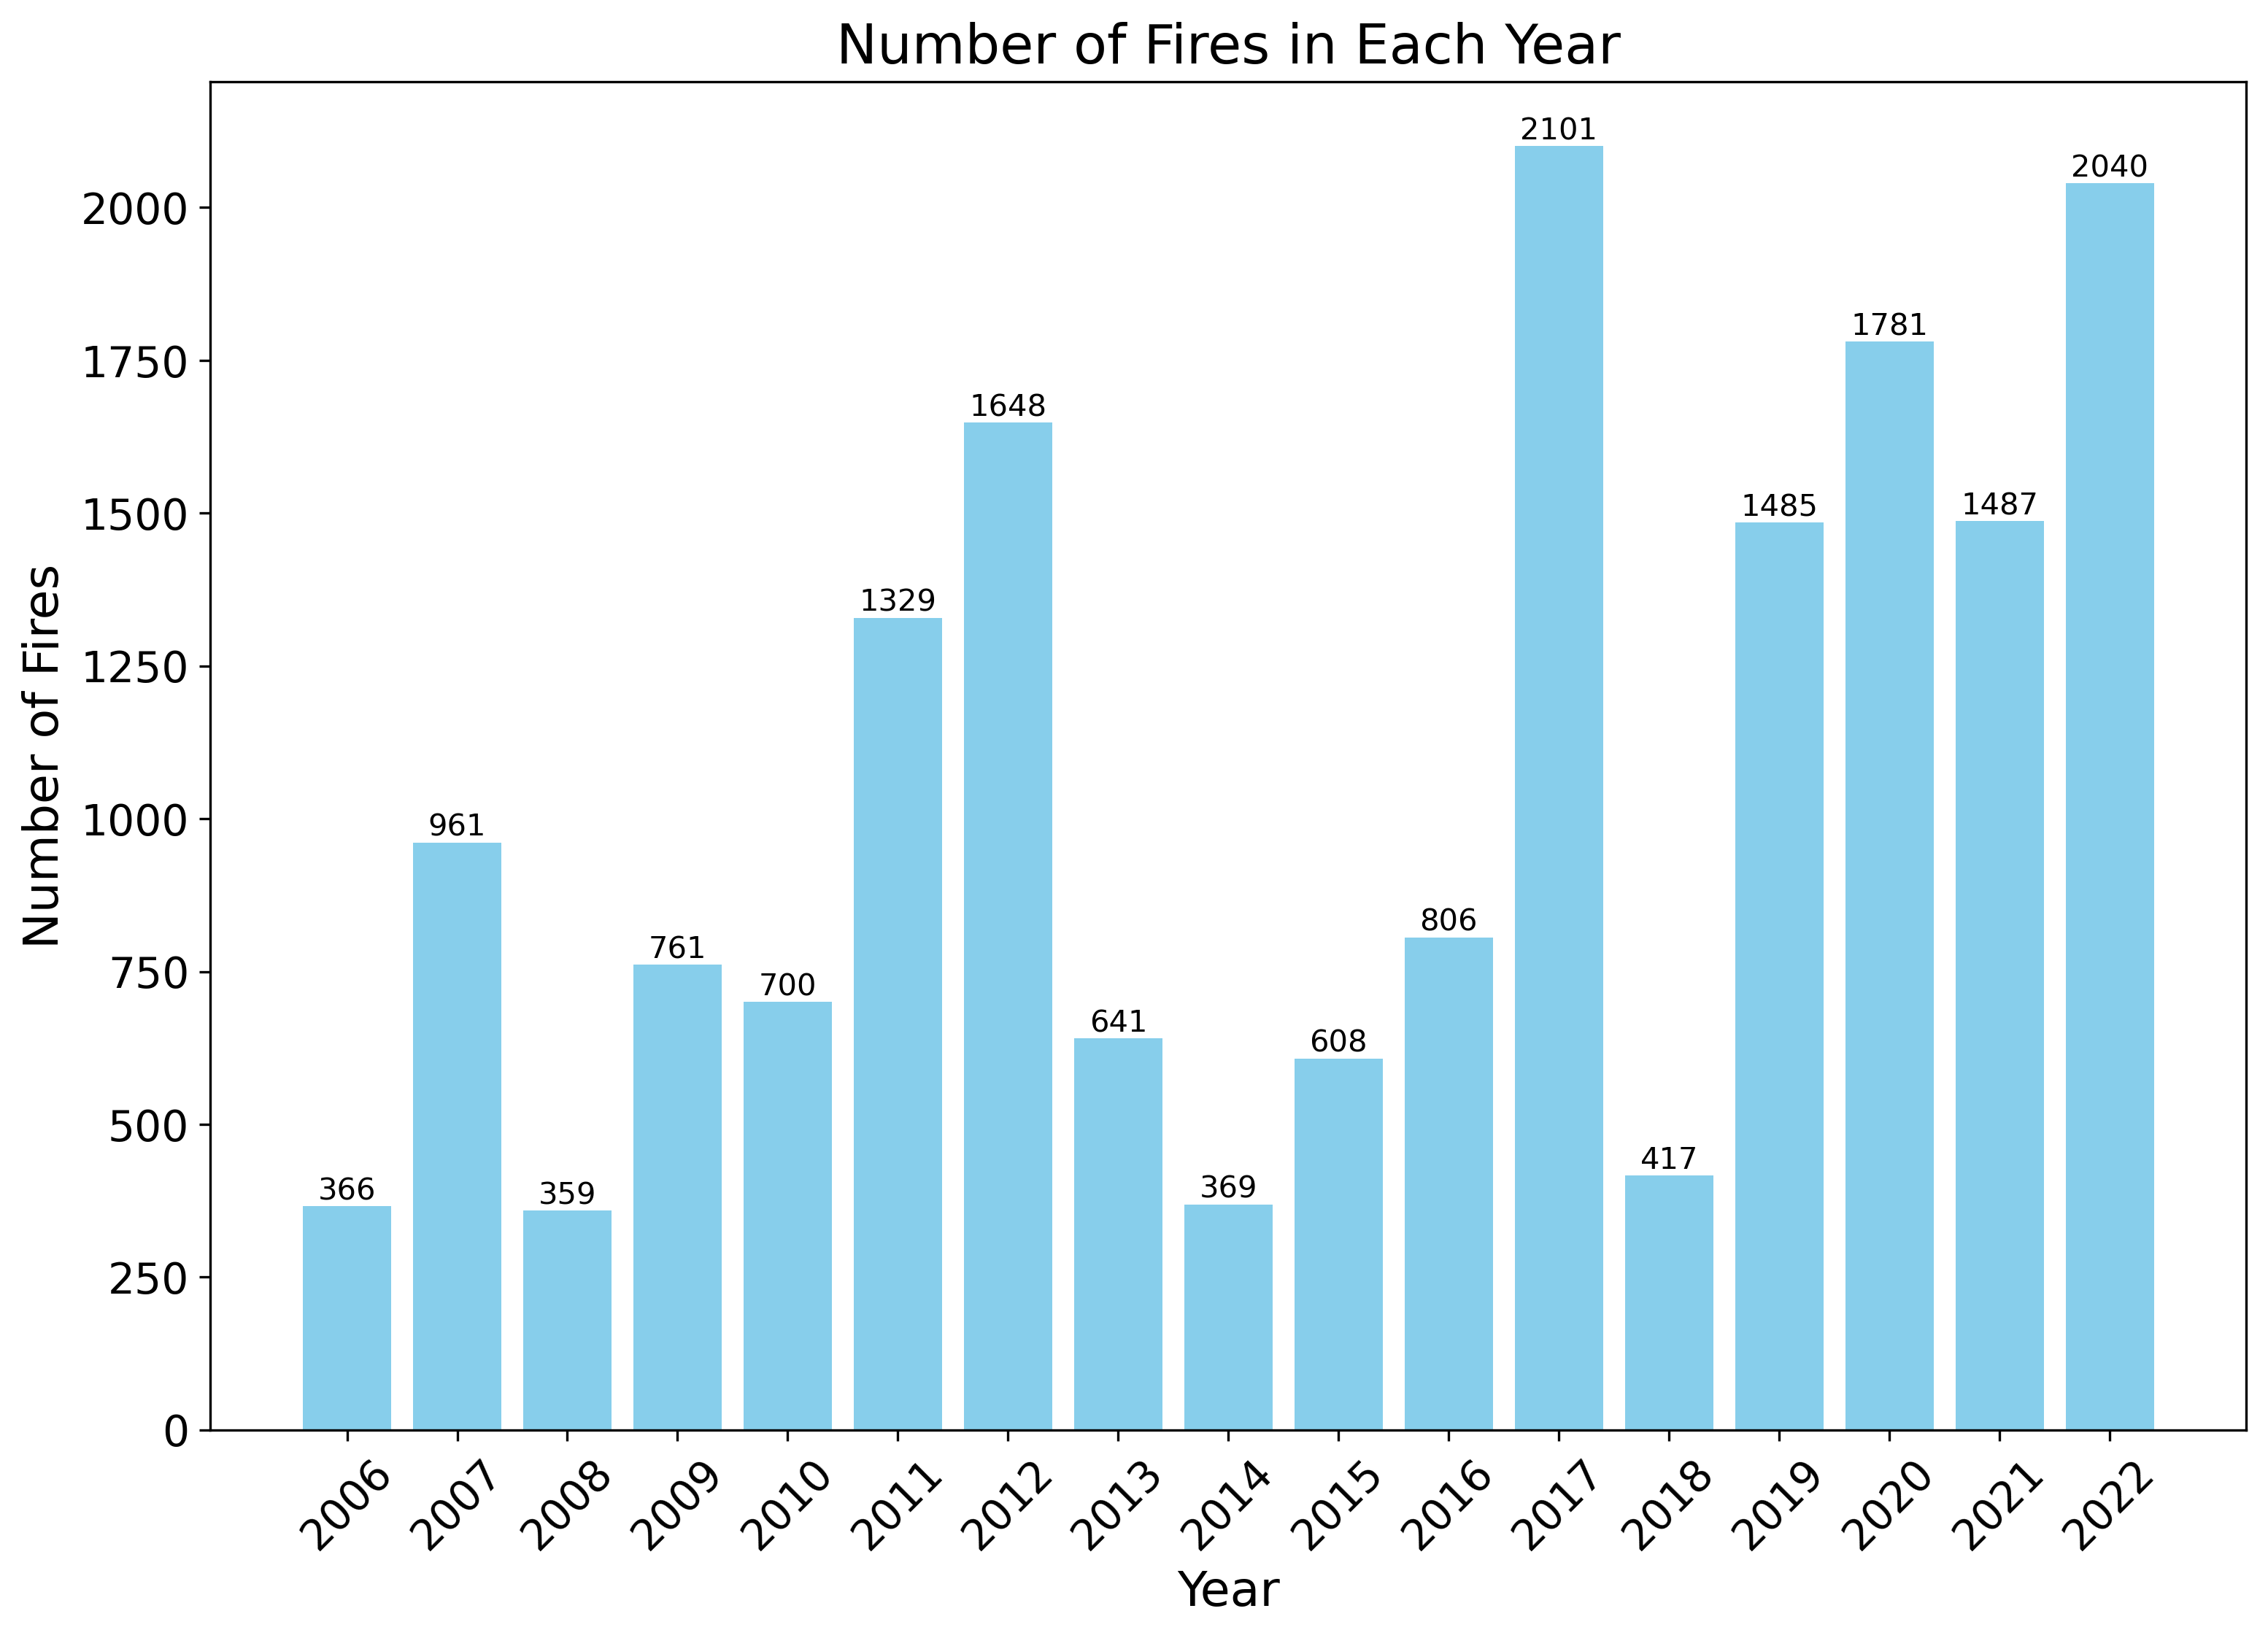

In [4]:



directory = '/home/udas/Desktop/UD_Data_Copy/b.final_burned_area'
# Dictionary to store year and number of files
year_file_count = {}

# Iterate over each subfolder in the directory
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Count the number of files in the folder
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        year_file_count[folder] = num_files

# Sort the dictionary by year (folder name)
year_file_count = dict(sorted(year_file_count.items()))

# Plotting
plt.figure(figsize=(12, 8), dpi=300)
bars=plt.bar(year_file_count.keys(), year_file_count.values(), color='skyblue')
# Increase font sizes for labels and title
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Fires', fontsize=18)
plt.title('Number of Fires in Each Year', fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=14)

#Adding the number labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom',fontsize=18)

save_pth='/home/udas/Desktop/UD_Data_Copy/Spatial_Models/graph_class_scripts/visualisations'
plt.savefig(os.path.join(save_pth,'yearwise.png'), dpi=300, bbox_inches='tight')
plt.show()



### Distribution of Burned Area Sizes

In [4]:
def get_burned_area_size(root,area_file):

    with open(area_file,'ab') as f:
        for year in tqdm(os.listdir(root)):
            year_path=os.path.join(root,year)
            # print(year_path)

            if os.path.isdir(year_path):
                for file in tqdm(os.listdir(year_path),leave=False):
                    if file.endswith(".nc"):
        
                        file_path = os.path.join(year_path,file)
                        # print(file_path)
                        dataset=xr.open_dataset(file_path)
                        ignition_point=dataset['ignition_points'].isel(time=-1).values
                        # print(ignition_point.shape)
                        fire_indices=np.argwhere(ignition_point>0)
                        # print(f' fire indices shape {fire_indices.shape}')
                        if fire_indices.shape[0]>1:
                            area=0
                            for idx in fire_indices:
                                # print(f'Inside multiple ignitions')
                                row,col=idx
                                # print(f'area is {area}')
                                # print(f'ind area is {ignition_point[row,col]}')
                                # print(f'sum is {area+ignition_point[row,col]}')
                                area+=ignition_point[row,col]
                                # print(f'new area is {area}')
                            area_list.append(area)
                        else:
                            # print(f'Inside single ignition')
                            # print(fire_indices)
                            row,col=fire_indices[0]
                            # print(row,col)
                            area=ignition_point[row,col]
                            # print(f'area is {area}')
                            area_list.append(area)
                        pickle.dump(area,f)
                        dataset.close()

    return area_list

def pickle_load_area(filepath):
    with open(filepath, 'rb') as f:
        area_list = []
        while True:
            try:
                # Load individual areas and append to the list
                area_list.append(pickle.load(f))
            except EOFError:
                break
    return area_list

def plot_area_size(area_list):
    plt.figure(figsize=(10, 6))
    plt.hist(area_list, bins=50, color='lightcoral', edgecolor='black')
    plt.xlabel('Burned Area (in hectares)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Burned Areas from Ignition Points')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [5]:
area_file='./areas.pkl'
# area_list=get_burned_area_size(directory,area_file)
pick_area=pickle_load_area(area_file)
print(pick_area[:5])

# plot_area_size(area_list)

[1471.0, 50.0, 144.0, 458.0, 41.0]


In [7]:
max(pick_area)

107602.0

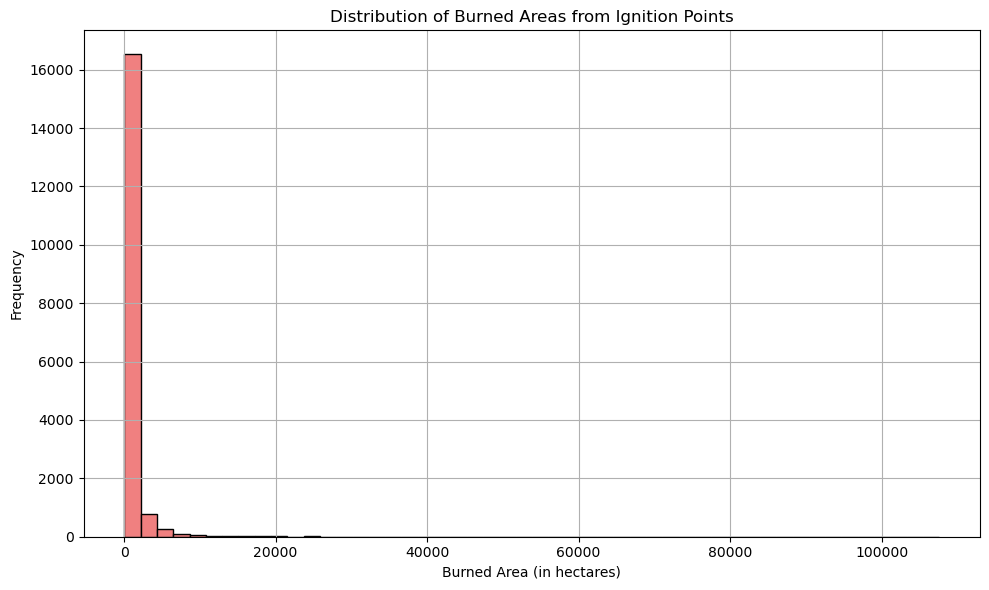

In [6]:
plot_area_size(pick_area)

In [17]:
def area_count_tabular(area_list,bins=50):
    count,bin_edges=np.histogram(area_list,bins=bins)
    bin_ranges=[]
    for i in range(len(bin_edges)-1):
        bin_ranges.append(f"{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}")
    df=pd.DataFrame({'burned_area hectares':bin_ranges,'count':count})
    return df 

df=area_count_tabular(pick_area,50)
print(df)

   burned_area hectares  count
0         30.00-2181.44  16524
1       2181.44-4332.88    767
2       4332.88-6484.32    280
3       6484.32-8635.76     95
4      8635.76-10787.20     68
5     10787.20-12938.64     30
6     12938.64-15090.08     20
7     15090.08-17241.52     15
8     17241.52-19392.96      8
9     19392.96-21544.40      8
10    21544.40-23695.84      6
11    23695.84-25847.28      9
12    25847.28-27998.72      5
13    27998.72-30150.16      3
14    30150.16-32301.60      0
15    32301.60-34453.04      2
16    34453.04-36604.48      4
17    36604.48-38755.92      0
18    38755.92-40907.36      0
19    40907.36-43058.80      4
20    43058.80-45210.24      2
21    45210.24-47361.68      2
22    47361.68-49513.12      0
23    49513.12-51664.56      4
24    51664.56-53816.00      0
25    53816.00-55967.44      1
26    55967.44-58118.88      0
27    58118.88-60270.32      0
28    60270.32-62421.76      0
29    62421.76-64573.20      0
30    64573.20-66724.64      0
31    66

### Countrywise

In [ ]:
ds=xr.open_dataset('/home/udas/Desktop/UD_Data_Copy/b.final_burned_area/2008/sample_1327.nc')
ds

In [10]:
def get_grid_extent(ds):
    
    long=ds['x'].values
    lat=ds['y'].values
    lat_min,lat_max=lat.min(),lat.max()
    long_min,long_max=long.min(),long.max()
    coordinates=lat_min,lat_max,long_min,long_max
    # print(coordinates)
    return coordinates

def get_countries(grid_extent,world):

    

    # Define your bounding box
    lat_min, lat_max, long_min, long_max = grid_extent

    # Create a GeoDataFrame from the bounding box
    bbox = gpd.GeoDataFrame(geometry=[box(long_min, lat_min, long_max, lat_max)], crs='EPSG:4326')
    # print(bbox)
    # Find countries that intersect with the bounding box
    intersecting_countries = gpd.sjoin(world, bbox, how='inner', op='intersects')

    # Print the intersecting countries
    # print(intersecting_countries['name'])

    return intersecting_countries['name']

def add_country_attribute(filepath,world):
    ds=xr.open_dataset(filepath,mode='a')
    grid_extent=get_grid_extent(ds)
    countries=get_countries(grid_extent,world)
    ds.attrs['countries']=','.join(countries)
    ds_2=ds
    ds.close()
    ds_2.to_netcdf(filepath)
    ds2.close()

def modify_folder_attribute(root,year):
    # Load a GeoJSON file containing country boundaries
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    for year_val in tqdm(os.listdir(root)):
        if year_val==year:
            folder_path=os.path.join(root,year_val)
            # print(folder_path)
            if os.path.isdir(folder_path) :
                # print('hereee')
                for file in tqdm(os.listdir(folder_path)):
                    # print(file) 
                    if file.endswith(".nc"):
                        file_path=os.path.join(folder_path,file)
                        # print('here')
                        # get_countries(get_grid_extent(xr.open_dataset(file_path)))
                        add_country_attribute(file_path,world)

In [11]:
modify_folder_attribute('/home/udas/Desktop/UD_Data_Copy/b.final_burned_area','2022')

/tmp/ipykernel_131951/12894290.py:41: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
  0%|          | 0/18 [00:00<?, ?it/s]/tmp/ipykernel_131951/12894290.py:54: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  add_country_attribute(file_path,world)
 78%|███████▊  | 14/18 [00:00<00:00, 859.94it/s]


PermissionError: [Errno 13] Permission denied: b'/home/udas/Desktop/UD_Data_Copy/b.final_burned_area/2022/sample_16971.nc'

<xarray.Dataset>
Dimensions:               (y: 64, x: 64, time: 1)
Coordinates:
  * time                  (time) datetime64[ns] 2022-01-02
  * x                     (x) float64 -6.178 -6.168 -6.158 ... -5.554 -5.544
  * y                     (y) float64 43.39 43.38 43.37 ... 42.78 42.77 42.76
Data variables: (12/30)
    aspect                (y, x) float32 ...
    burned_areas          (time, y, x) float32 ...
    curvature             (y, x) float32 ...
    d2m                   (time, y, x) float32 ...
    dem                   (y, x) float32 ...
    ignition_points       (time, y, x) float32 ...
    ...                    ...
    lc_settlement         (y, x) float32 ...
    lc_shrubland          (y, x) float32 ...
    lc_sparse_vegetation  (y, x) float32 ...
    lc_water_bodies       (y, x) float32 ...
    lc_wetland            (y, x) float32 ...
    population            (y, x) float32 ...